In [1]:
import pandas as pd
import pdfkit
import matplotlib.pyplot as plt
import random
from io import BytesIO
import binascii
import smtplib
from email import encoders
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from jinja2 import Template

(221, b'2.0.0 Closing connecton')

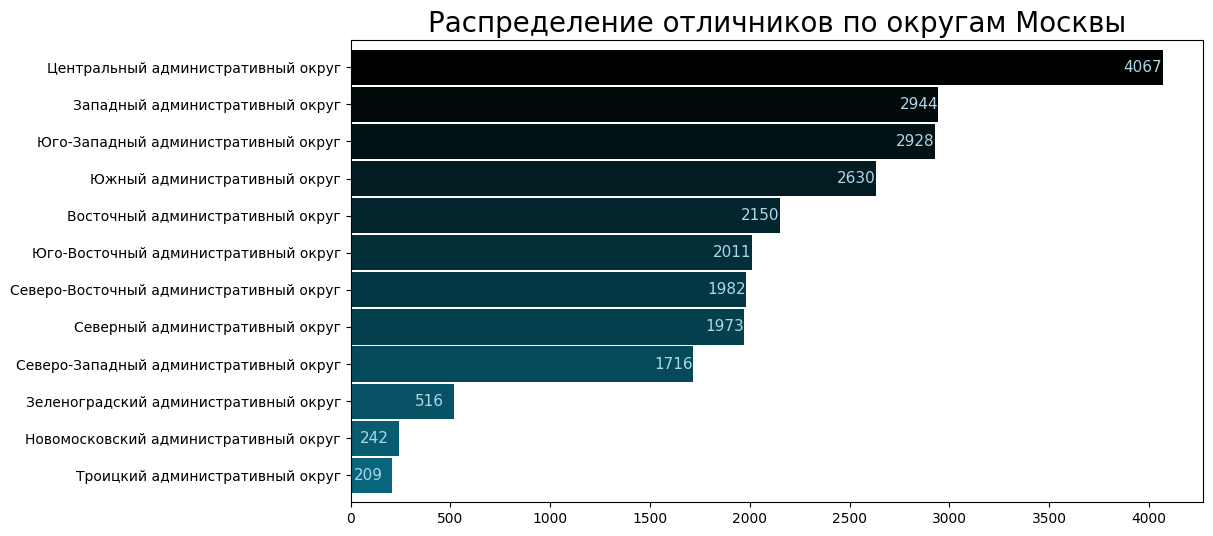

In [4]:
df = pd.read_csv('https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv',delimiter=";", usecols=["YEAR",'EDU_NAME','AdmArea','PASSES_OVER_220'])
pd.set_option('display.max_colwidth', None)
df = df[df['YEAR'] == "2018-2019"]
df.columns = ['Школа', 'Год', 'Округ', 'Кол-во отличников']
count = df.sum()['Кол-во отличников']
group = df.groupby('Округ').sum().sort_values('Кол-во отличников')
fig = plt.figure(figsize=(11,6))
area = fig.add_subplot(1,1,1)
colors = ['#000000' ,'#01090b' ,'#011217' ,'#021c22' ,'#03252d' ,'#042e38' ,'#043744' ,'#05404f' ,'#06495a' ,'#075365' ,'#075c71' ,'#08657c' ]
colors.reverse()
ax = group['Кол-во отличников'].plot.barh(ax=area, width=0.95, color=colors, ylabel= '')
ax.bar_label(ax.containers[0], padding=-28, color='lightblue', label_type='edge', fontsize=11)
plt.title('Распределение отличников по округам Москвы', fontsize=20)
img = BytesIO()
plt.savefig(img)
img = 'data:image/png;base64,' + binascii.b2a_base64(img.getvalue(), newline=False).decode('UTF-8')  # кодируем изображение в аксиль
df.sort_values('Кол-во отличников', inplace=True, ascending=False)
html = """<!DOCTYPE html>
<head>
    <meta charset = 'utf-8'/'
    <title>Отчет по результатам ЕГЭ в 2018-2019 году</title>
</head>
<body>
    <h1 style='font-size:30px'><center><b>Отчет по результатам ЕГЭ в 2018-2019 году</b></center></h1>
    <p><center><b>Общее число отличников:</b>{{c}}</p>
    <img src={{img}} alt = 'Распределение отличников по округам Москвы'>
    <p>Лучшая школа: {{best}}</p>
    {{table}}
</body>
</html>"""

html = Template(html).render(c=count, img=img, table=df.to_html(index=False), best = str(df.head(1)["Школа"].values[0]))
config = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {'page-size': 'A4',
          'header-right': '[Page]'}
pdfkit.from_string(html, 'Отчёт по ЕГЭ.pdf' , configuration=config, options=options)
letter = MIMEMultipart()
letter["From"] = "sadm1sha@yandex.ru"
letter["Subject"] = "Отчет по результатам ЕГЭ в 2018-2019 году"
letter["Content-Type"] = "text/html; charset=utf-8"
letter["To"] = "lusnikov02@mail.ru"
letter.attach(MIMEText(html, 'html'))
attachement = MIMEBase('application', 'pdf')
attachement.set_payload(open('Отчёт по ЕГЭ.pdf', 'rb').read())            
attachement.add_header('Content-Disposition',
                      'attachement; filename="USE_report.pdf"')
encoders.encode_base64(attachement)
letter.attach(attachement)
user = 'sadm1sha@yandex.ru'
password = "(mMOPE280802)"
server = smtplib.SMTP_SSL("smtp.yandex.ru", 465)
server.login(user, password)
server.sendmail("sadm1sha@yandex.ru",
               "lusnikov02@mail.ru",
               letter.as_string())
server.quit()

# df = pd.read_csv('https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv',delimiter=";", usecols=["YEAR",'EDU_NAME','AdmArea','PASSES_OVER_220'])
pd.set_option('display.max_colwidth', None)
df = df[df['YEAR'] == "2018-2019"]
df.columns = ['Школа', 'Год', 'Округ', 'Кол-во отличников']
count = df.sum()['Кол-во отличников']
group = df.groupby('Округ').sum().sort_values('Кол-во отличников')
fig = plt.figure(figsize=(11,6))
area = fig.add_subplot(1,1,1)
colors = ['#000000'
,'#01090b'
,'#011217'
,'#021c22'
,'#03252d'
,'#042e38'
,'#043744'
,'#05404f'
,'#06495a'
,'#075365'
,'#075c71'
,'#08657c'
]
colors.reverse()

ax = group['Кол-во отличников'].plot.barh(ax=area, width=0.95, color=colors, ylabel= '')
ax.bar_label(ax.containers[0], padding=-25, color='white', label_type='edge', fontsize=12)
plt.show()

In [129]:
df

,Школа,Год,Округ,Кол-во отличников
1498,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 1360»,2018-2019,Восточный административный округ,41
1499,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 1795 «Лосиноостровская»,2018-2019,Восточный административный округ,12
1500,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 2093 им. А.Н. Савельева»,2018-2019,Восточный административный округ,19
1501,Автономная некоммерческая организация средняя общеобразовательная школа «Академическая гимназия»,2018-2019,Восточный административный округ,1
1502,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 1371 «Крылатское»,2018-2019,Западный административный округ,25
...,...,...,...,...
2181,Государственное бюджетное профессиональное образовательное учреждение города Москвы «Киноколледж № 40 «Московская международная киношкола»,2018-2019,Южный административный округ,1
2182,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 514»,2018-2019,Южный административный округ,4
2183,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 2016»,2018-2019,Южный административный округ,6
2184,Государственное бюджетное общеобразовательное учреждение города Москвы «Школа № 878»,2018-2019,Южный административный округ,24
